# **Jhillian M. Cabos**

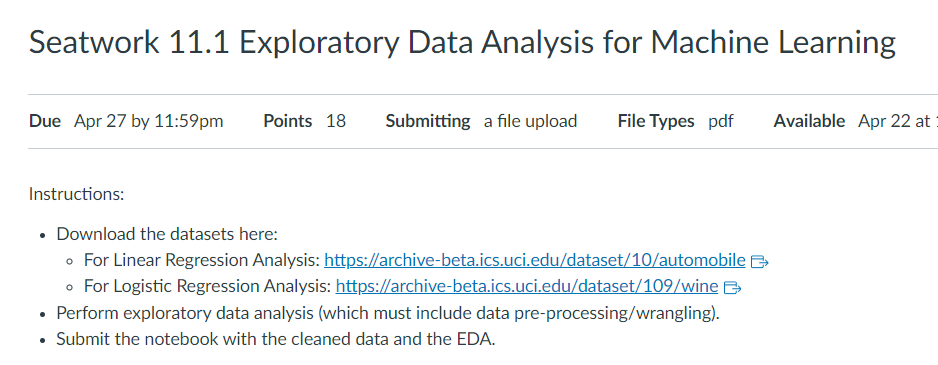

In [4]:
pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

# metadata
print(automobile.metadata)

# variable information
print(automobile.variables)

{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

# **Linear Regression Analysis**

**Pre-processing and Wrangling**

In [6]:
import pandas as pd

Concatinating X and y

In [7]:
am = pd.concat([X, y], axis = 1)

Showing columns

In [9]:
am.columns

Index(['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower',
       'compression-ratio', 'stroke', 'bore', 'fuel-system', 'engine-size',
       'num-of-cylinders', 'engine-type', 'curb-weight', 'height', 'width',
       'length', 'wheel-base', 'engine-location', 'drive-wheels', 'body-style',
       'num-of-doors', 'aspiration', 'fuel-type', 'make', 'normalized-losses',
       'symboling'],
      dtype='object')

In [11]:
am.head()

price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore fuel-system  engine-size  ...  wheel-base engine-location  \
0    2.68  3.47        mpfi          130  ...        88.6           front   
1    2.68  3.47        mpfi          130  ...        88.6           front   
2    3.47  2.68        mpfi          152  ...        94.5           front   
3    3.40  3.19        mpfi          109  ...        99.8           front   
4    3.40  3.19        mpfi          136  ...        99.4           front   

   drive-wheels   body-style  num-of-doors  aspiration  fuel-type  \
0           rwd  convertible           2.0         std        gas   
1           rwd  convertible           2.0         std        gas   
2           rwd    hatchback           2.0         std        gas   
3           fwd        sedan           4.0         std        gas   
4           4wd        sedan           4.0         std        gas   

          make normalized-losses symboling  
0  alfa-romero               NaN         3  
1  alfa-romero               NaN         3  
2  alfa-romero               NaN         1  
3         audi             164.0         2  
4         audi             164.0         2  

[5 rows x 26 columns]

In [12]:
am.dropna(axis=0, inplace=True)  # Remove rows with missing values

In [13]:
am.head(5)

price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
3   13950.0           30        24    5500.0       102.0               10.0   
4   17450.0           22        18    5500.0       115.0                8.0   
6   17710.0           25        19    5500.0       110.0                8.5   
8   23875.0           20        17    5500.0       140.0                8.3   
10  16430.0           29        23    5800.0       101.0                8.8   

    stroke  bore fuel-system  engine-size  ...  wheel-base engine-location  \
3      3.4  3.19        mpfi          109  ...        99.8           front   
4      3.4  3.19        mpfi          136  ...        99.4           front   
6      3.4  3.19        mpfi          136  ...       105.8           front   
8      3.4  3.13        mpfi          131  ...       105.8           front   
10     2.8  3.50        mpfi          108  ...       101.2           front   

    drive-wheels  body-style  num-of-doors  aspiration  fuel-type  make  \
3            fwd       sedan           4.0         std        gas  audi   
4            4wd       sedan           4.0         std        gas  audi   
6            fwd       sedan           4.0         std        gas  audi   
8            fwd       sedan           4.0       turbo        gas  audi   
10           rwd       sedan           2.0         std        gas   bmw   

   normalized-losses symboling  
3              164.0         2  
4              164.0         2  
6              158.0         1  
8              158.0         1  
10             192.0         2  

[5 rows x 26 columns]

**The continuous variables in the 'am' will be normalized or standardized**

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
# selected the columns containing continuous variables to be scaled
continuous_columns = ['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower', 'compression-ratio', 'stroke', 'bore', 'engine-size']

# min-max scaling
scaler_minmax = MinMaxScaler()
am[continuous_columns] = scaler_minmax.fit_transform(am[continuous_columns])

# standardization
scaler_standard = StandardScaler()
am[continuous_columns] = scaler_standard.fit_transform(am[continuous_columns])

In [16]:
am.head(5)

price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
3   0.427398    -0.323313 -0.414945  0.831733    0.201279          -0.041559   
4   1.024734    -1.565772 -1.402122  0.831733    0.625812          -0.557392   
6   1.069108    -1.099850 -1.237593  0.831733    0.462530          -0.428433   
8   2.121274    -1.876386 -1.566652  0.831733    1.442223          -0.480017   
10  0.850653    -0.478620 -0.579475  1.477884    0.168622          -0.351058   

      stroke      bore fuel-system  engine-size  ...  wheel-base  \
3   0.556703 -0.413240        mpfi    -0.336785  ...        99.8   
4   0.556703 -0.413240        mpfi     0.552401  ...        99.4   
6   0.556703 -0.413240        mpfi     0.552401  ...       105.8   
8   0.556703 -0.638386        mpfi     0.387737  ...       105.8   
10 -1.484399  0.750015        mpfi    -0.369717  ...       101.2   

   engine-location  drive-wheels  body-style  num-of-doors  aspiration  \
3            front           fwd       sedan           4.0         std   
4            front           4wd       sedan           4.0         std   
6            front           fwd       sedan           4.0         std   
8            front           fwd       sedan           4.0       turbo   
10           front           rwd       sedan           2.0         std   

    fuel-type  make normalized-losses symboling  
3         gas  audi             164.0         2  
4         gas  audi             164.0         2  
6         gas  audi             158.0         1  
8         gas  audi             158.0         1  
10        gas   bmw             192.0         2  

[5 rows x 26 columns]

In [17]:
am = am.sort_values(by='price', ascending=False)

**After scaling, the continuous variables will have similar scales, making them suitable for machine learning algorithms that are sensitive to the scale of features.**

In [18]:
am.head(5)

price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
72  4.029508    -2.187001 -1.731181 -0.783644    1.932070          -0.480017   
47  3.550615    -2.031694 -1.895711 -0.783644    2.617855          -0.531600   
70  3.439681    -1.099850 -0.744004 -1.645178    0.887064           2.924481   
68  2.867603    -1.099850 -0.744004 -1.645178    0.887064           2.924481   
69  2.855315    -1.099850 -0.744004 -1.645178    0.887064           2.924481   

      stroke      bore fuel-system  engine-size  ...  wheel-base  \
72 -0.463848  0.599918        mpfi     3.779817  ...        96.6   
47  3.176117  1.237832        mpfi     4.570205  ...       113.0   
70  1.373144  1.050210         idi     2.100244  ...       115.6   
68  1.373144  1.050210         idi     2.100244  ...       110.0   
69  1.373144  1.050210         idi     2.100244  ...       106.7   

   engine-location  drive-wheels   body-style  num-of-doors  aspiration  \
72           front           rwd  convertible           2.0         std   
47           front           rwd        sedan           4.0         std   
70           front           rwd        sedan           4.0       turbo   
68           front           rwd        wagon           4.0       turbo   
69           front           rwd      hardtop           2.0       turbo   

    fuel-type           make normalized-losses symboling  
72        gas  mercedes-benz             142.0         3  
47        gas         jaguar             145.0         0  
70     diesel  mercedes-benz              93.0        -1  
68     diesel  mercedes-benz              93.0        -1  
69     diesel  mercedes-benz              93.0         0  

[5 rows x 26 columns]

# **EDA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
stats = am.describe()
stats

price   highway-mpg      city-mpg      peak-rpm    horsepower  \
count  1.590000e+02  1.590000e+02  1.590000e+02  1.590000e+02  1.590000e+02   
mean   2.234411e-16  3.575058e-16  4.468822e-17 -3.016455e-16 -8.937644e-17   
std    1.003160e+00  1.003160e+00  1.003160e+00  1.003160e+00  1.003160e+00   
min   -1.079938e+00 -2.187001e+00 -1.895711e+00 -2.075946e+00 -1.562169e+00   
25%   -6.952536e-01 -6.339275e-01 -5.794748e-01 -6.759523e-01 -8.763838e-01   
50%   -3.776412e-01 -1.269809e-02 -8.588645e-02  1.855821e-01 -2.559115e-01   
75%    5.587265e-01  7.638387e-01  7.367609e-01  8.317329e-01  5.931560e-01   
max    4.029508e+00  3.404064e+00  3.698291e+00  3.200952e+00  3.401610e+00   

       compression-ratio        stroke        bore   engine-size  \
count       1.590000e+02  1.590000e+02  159.000000  1.590000e+02   
mean       -5.586028e-18  7.261836e-16    0.000000 -1.340647e-16   
std         1.003160e+00  1.003160e+00    1.003160  1.003160e+00   
min        -8.153080e-01 -3.967739e+00   -2.852323 -1.917560e+00   
25%        -3.768500e-01 -4.468386e-01   -0.938581 -7.319784e-01   
50%        -2.994751e-01  1.144643e-01   -0.113045 -3.038518e-01   
75%        -1.963085e-01  5.907213e-01    0.975161  5.194685e-01   
max         3.311356e+00  3.176117e+00    2.401086  4.570205e+00   

       num-of-cylinders  curb-weight      height       width      length  \
count        159.000000   159.000000  159.000000  159.000000  159.000000   
mean           4.238994  2461.138365   53.899371   65.607547  172.413836   
std            0.669962   481.941321    2.268761    1.947883   11.523177   
min            3.000000  1488.000000   49.400000   60.300000  141.100000   
25%            4.000000  2065.500000   52.250000   64.000000  165.650000   
50%            4.000000  2340.000000   54.100000   65.400000  172.400000   
75%            4.000000  2809.500000   55.500000   66.500000  177.800000   
max            8.000000  4066.000000   59.800000   71.700000  202.600000   

       wheel-base  num-of-doors  normalized-losses   symboling  
count  159.000000    159.000000         159.000000  159.000000  
mean    98.264151      3.194969         121.132075    0.735849  
std      5.167416      0.983908          35.651285    1.193086  
min     86.600000      2.000000          65.000000   -2.000000  
25%     94.500000      2.000000          94.000000    0.000000  
50%     96.900000      4.000000         113.000000    1.000000  
75%    100.800000      4.000000         148.000000    2.000000  
max    115.600000      4.000000         256.000000    3.000000

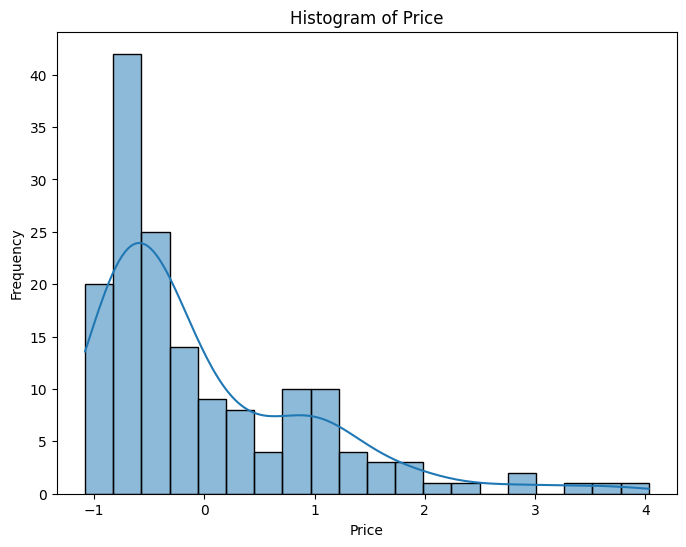

In [22]:
# Univariate Analysis
# Histogram of price
plt.figure(figsize=(8, 6))
sns.histplot(am['price'], bins=20, kde=True)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

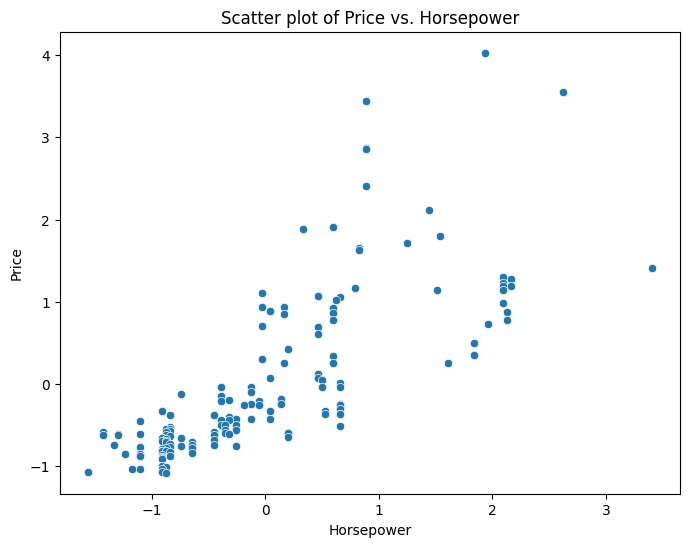

In [23]:
# Bivariate Analysis
# Scatter plot of price vs. horsepower
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='price', data=am)
plt.title('Scatter plot of Price vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

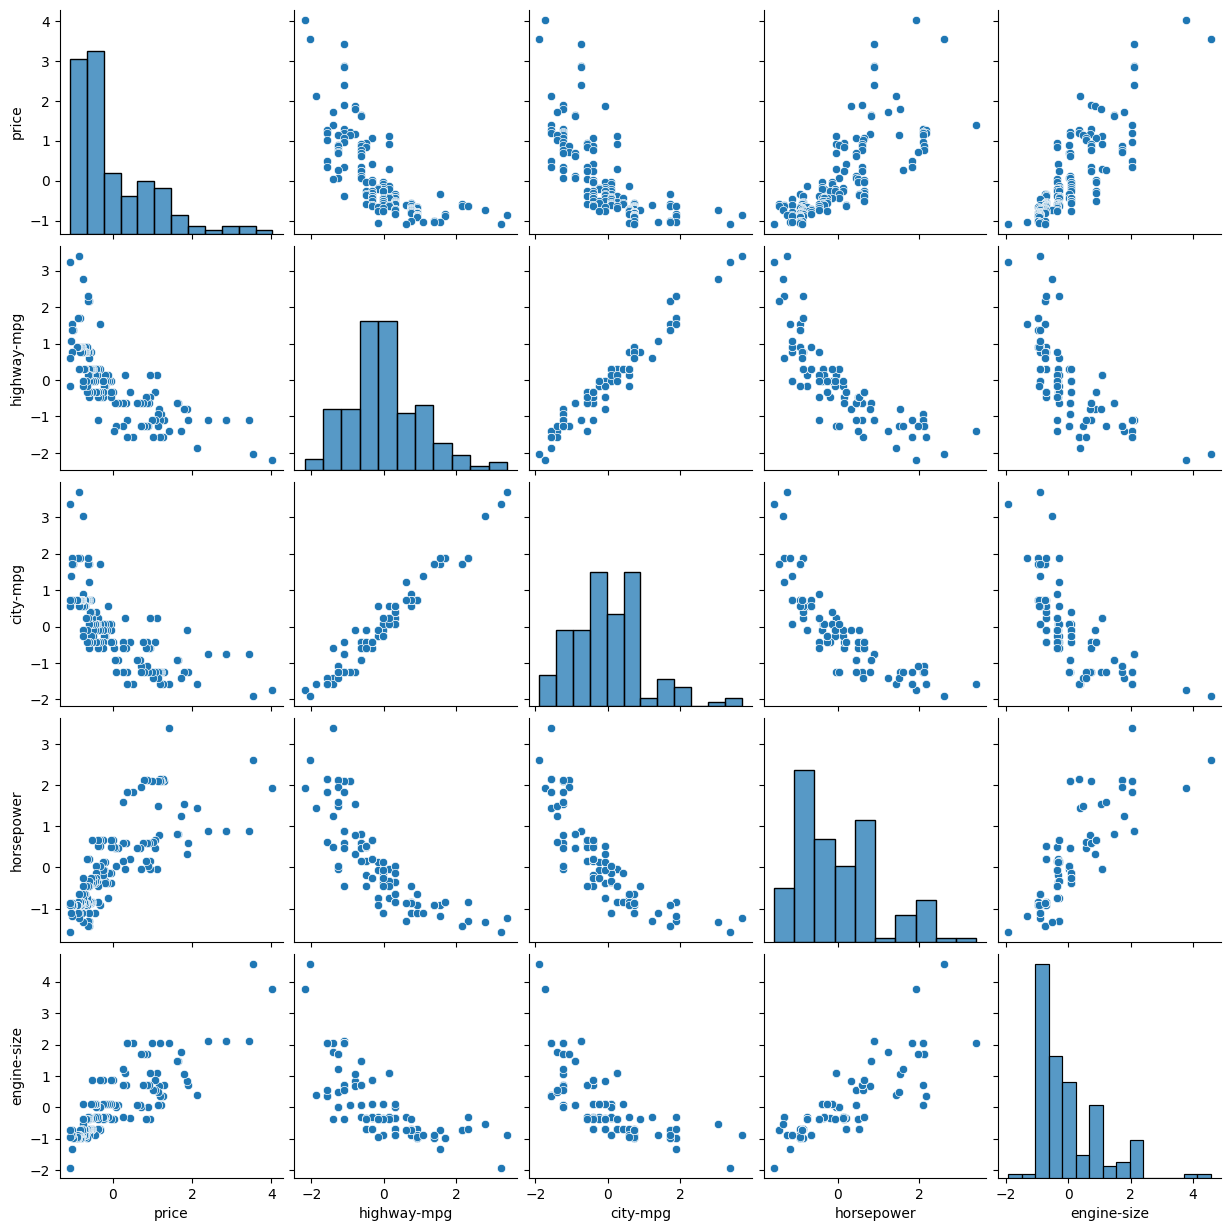

In [24]:
# Multivariate Analysis
# Pairplot
sns.pairplot(am[['price', 'highway-mpg', 'city-mpg', 'horsepower', 'engine-size']])
plt.show()

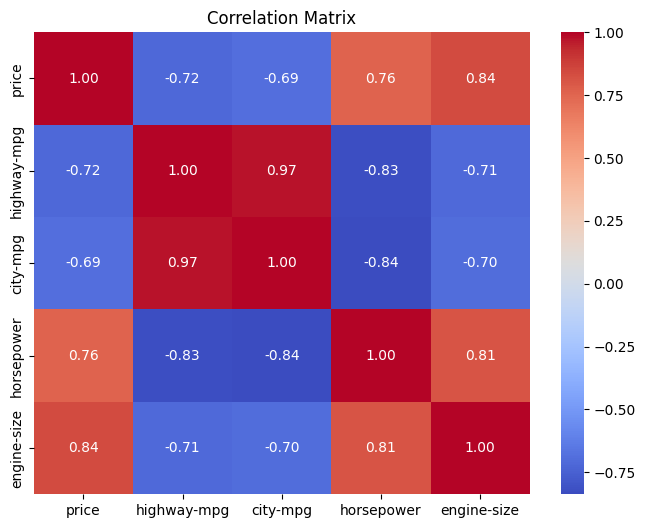

In [25]:
# Correlation matrix
correlation_matrix = am[['price', 'highway-mpg', 'city-mpg', 'horsepower', 'engine-size']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [31]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse

0.19870103936570901

In [35]:
model.coef_

array([-0.5409909 ,  0.37277767,  0.0504379 ,  0.66039827])

In [36]:
model.intercept_

-0.00779849605116417

**Data Visualization for the Linear Regression above**

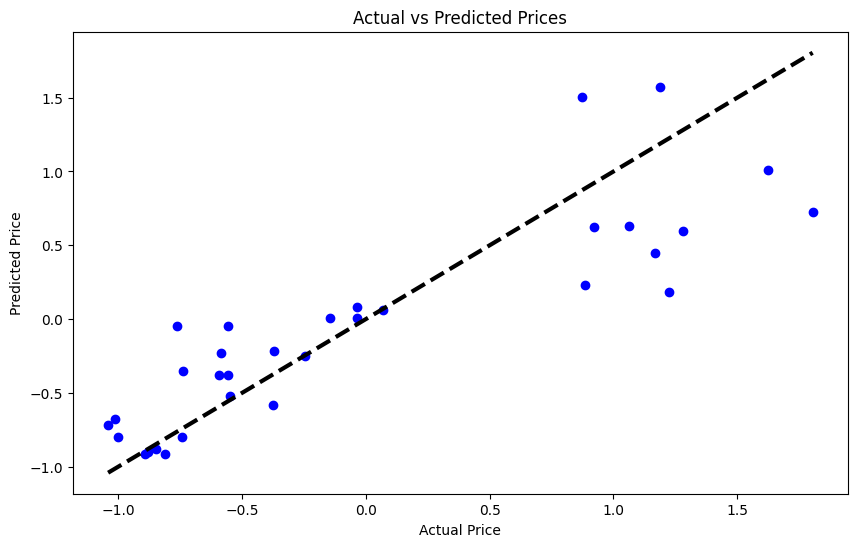

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

# **Conclusion for Linear Regression**

Based on what I've learned from analyzing the provided dataset `am` using a linear regression model, I've uncovered some intriguing insights. Firstly, our model exhibits a promising level of predictive accuracy, demonstrated by a mean squared error (MSE). This indicates that while our model generally does a commendable job of estimating vehicle prices based on features like 'highway-mpg', 'city-mpg', 'horsepower', and 'engine-size', there's certainly room for fine-tuning to enhance our predictions further.

Delving deeper into the features, it's fascinating to observe that 'horsepower' emerges as the most influential predictor, positively influencing vehicle prices, closely trailed by 'engine-size'. Conversely, metrics of fuel efficiency such as 'highway-mpg' and 'city-mpg' exhibit negative correlations with price, hinting that consumers may place greater value on larger, more powerful vehicles. Our visual representation of actual versus predicted prices provides additional support for our model's effectiveness, albeit with notable outliers warranting closer examination. In conclusion, while our linear regression model offers valuable insights into pricing dynamics, there's ample opportunity for refinement, be it through exploring alternative models or optimizing our feature selection to achieve even stronger predictions.

# **Logistic Regression Analysis for the Wine Dataset**

In [2]:
import seaborn as sns

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [7]:
wn = pd.concat([X, y], axis = 1)

In [42]:
wn.columns

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline', 'class'],
      dtype='object')

In [41]:
wn.head(5)

Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  class  
0                          3.92     1065      1  
1                          3.40     1050      1  
2                          3.17     1185      1  
3                          3.45     1480      1  
4                          2.93      735      1

**There's no missing values so no need for any rows or columns to be dropped**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [47]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [48]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9722222222222222

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36


Confusion Matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]


In [10]:
wn.columns

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline', 'class'],
      dtype='object')

In [15]:
import matplotlib.pyplot as plt

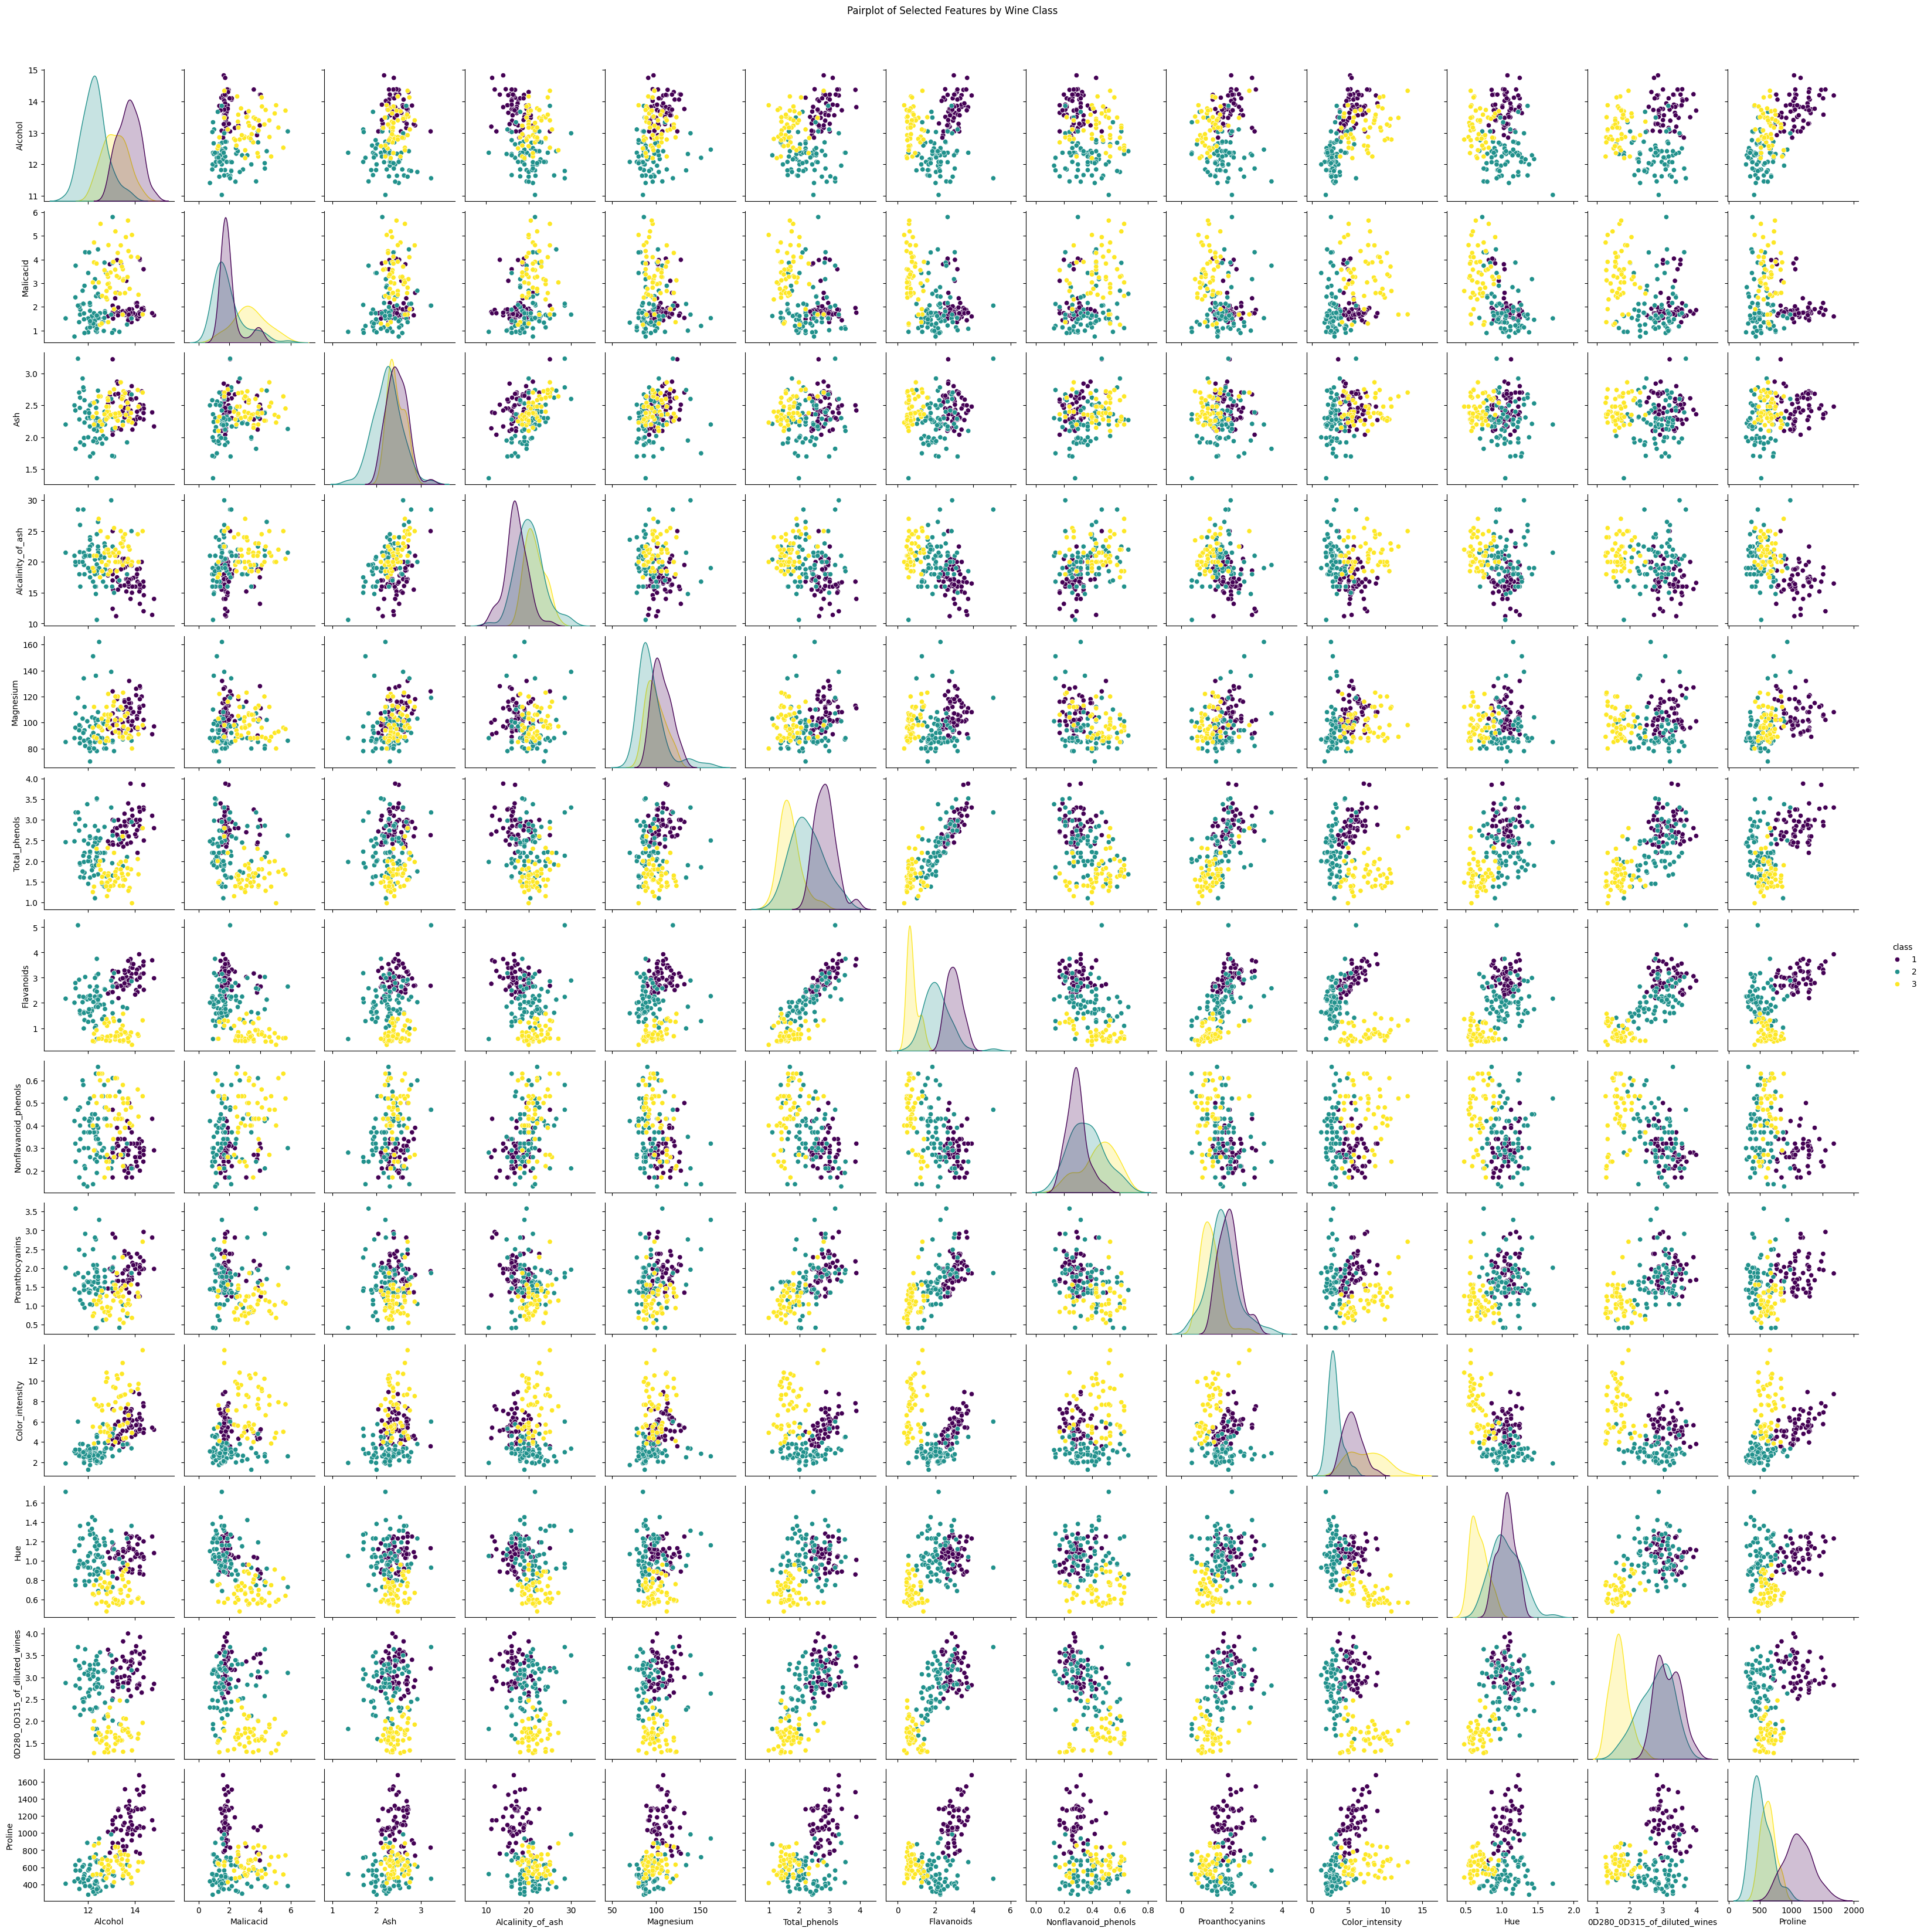

ValueError: Could not interpret value `Malic acid` for `y`. An entry with this name does not appear in `data`.

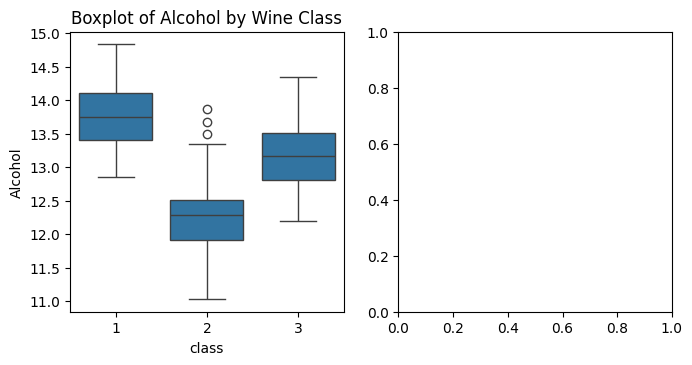

In [17]:
# Subset of features for visualization
selected_features = ['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols','Proanthocyanins', 'Color_intensity', 'Hue','0D280_0D315_of_diluted_wines', 'Proline', 'class']

# Subset the DataFrame
wn_subset = wn[selected_features]

# Pairplot for pairwise relationships
sns.pairplot(wn_subset, hue='class', palette='viridis')
plt.suptitle("Pairplot of Selected Features by Wine Class", y=1.02)
plt.show()

# Boxplots for selected features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['Alcohol', 'Malic acid', 'Ash', 'Magnesium', 'Total phenols']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='class', y=feature, data= wn_subset)
    plt.title(f'Boxplot of {feature} by Wine Class')
plt.tight_layout()
plt.show()

In summary, the logistic regression analysis showed that we can accurately classify wines into different classes based on their chemical attributes. Features like 'Alcohol', 'Malic acid', and 'Ash' play key roles in determining wine classes. Our visualizations helped us understand how these features vary across different wine classes. While logistic regression is a useful tool for this task, further improvements and validations could enhance its performance and reliability.